In [1]:
import warnings

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random

In [4]:
torch.__version__

'1.1.0'

device 설정

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

for reproducibility

In [6]:
torch.manual_seed(777)
random.seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [7]:
device

'cpu'

In [8]:
import os
import sys
import numpy as np

In [9]:
cwd = os.getcwd()

In [10]:
sys.version_info

sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0)

In [11]:
from mnist import *

In [12]:
# parameters
training_epochs = 15
batch_size = 100

In [13]:
mymnist = MyMNIST(batch_size)

In [14]:
## MNIST data image of shape 28 * 28 = 784
# linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [16]:
mymnist.train_data_loader.batch_size

100

In [17]:
mymnist.mnist_train.train_data.shape

torch.Size([60000, 28, 28])

In [18]:
mymnist.mnist_train.train_data[0].shape

torch.Size([28, 28])

In [19]:
mymnist.mnist_train.train_labels.shape

torch.Size([60000])

In [20]:
mymnist.mnist_train.train_labels[0]

tensor(5)

In [21]:
print(mymnist.mnist_train.train_data[0].min(), mymnist.mnist_train.train_data[0].max())
print(mymnist.mnist_train.train_labels[0].min(), mymnist.mnist_train.train_labels[0].max())

tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
tensor(5) tensor(5)


In [22]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(784, 10, bias=True)
        
    def forward(self, x):
        return self.linear(x)

In [23]:
linear_model = LinearModel().to(device)

` Softmax is internally computed.` - CrossEntropyLoss()에서 

- criterion: 어떤 loss를 줄일 것인지에 대해 명시

In [24]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # 여기서 softmax자동계산    
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.1)

In [25]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mymnist.train_data_loader)

    for X, Y in mymnist.train_data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device) # view는 reshape와 같은 역할, reshape도 있지만 view를 쓰는 것이 좋음
        Y = Y.to(device)

        
        hypothesis = linear_model(X)
        cost = criterion(hypothesis, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535468459
Epoch: 0002 cost = 0.359274179
Epoch: 0003 cost = 0.331187546
Epoch: 0004 cost = 0.316578060
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180763
Epoch: 0007 cost = 0.295130253
Epoch: 0008 cost = 0.290851533
Epoch: 0009 cost = 0.287417084
Epoch: 0010 cost = 0.284379601
Epoch: 0011 cost = 0.281825185
Epoch: 0012 cost = 0.279800743
Epoch: 0013 cost = 0.277808994
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440825
Learning finished


In [29]:
import matplotlib.pyplot as plt

Accuracy: 0.8863000273704529
Label:  5
Prediction:  3


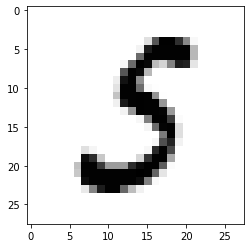

In [30]:
# Test the model using test sets
with torch.no_grad():
    X_test = mymnist.mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mymnist.mnist_test.test_labels.to(device)

    prediction = linear_model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mymnist.mnist_test) - 1)
    X_single_data = mymnist.mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mymnist.mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear_model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mymnist.mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()